In [48]:
import numpy as np
import h5py
import cv2
import matplotlib.pyplot as plt
import pandas
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

In [2]:
def img_norm(img):
    ratio = 255/(img.max()-img.min())
    new_img = (img*ratio).astype(np.uint8)
    #new_max = new_img.max()
    return new_img

In [77]:
gt_path = 'D:/PETS2009/violation_datasets/test/gp_violations.h5'
pred_mvms_path = './MVMS_PETS2009/counting_results/counting_num_mvms.h5'


In [78]:
gt = h5py.File(gt_path,'r')
pred_mvms = h5py.File(pred_mvms_path,'r')


In [79]:
print(gt.keys())
print(pred_mvms.keys())

<KeysViewHDF5 ['density_maps', 'segment_maps']>
<KeysViewHDF5 ['pred_dmap_gplane']>


In [80]:
gt_den = gt['density_maps']
gt = gt['segment_maps']
mvms = pred_mvms['pred_dmap_gplane']


In [81]:
gt = np.array(gt).squeeze()
mvms = np.array(mvms).squeeze()
gt_den = np.array(gt_den).squeeze()

In [82]:
print(gt.shape)
print(mvms.shape)
print(gt_den.shape)

(794, 710, 610)
(794, 177, 152)
(794, 710, 610)


In [83]:
gt_den_new = []
for img in gt_den:
    img = cv2.resize(img,(610,710))
    gt_den_new.append(img)

In [88]:
mvms_new = []
for img in mvms:
    img = cv2.resize(img,(610,710))
    img = img_norm(img)
    img[img<35] =1
    img[img>=35] = 0
    mvms_new.append(img)

In [60]:
gt_den = []
for img in gt_den:
    img = cv2.resize(img,(610,710))
    img = img_norm(img)
    img[img<35] =1
    img[img>=35] = 0
    gt_den.append(img)

In [84]:
gt_den = np.array(gt_den_new).squeeze()

In [85]:
print(gt_den.shape)

(794, 710, 610)


In [91]:
print(mvms_new[0])

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


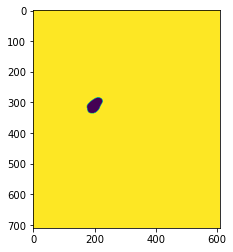

In [92]:
plt.imshow(mvms_new[0])

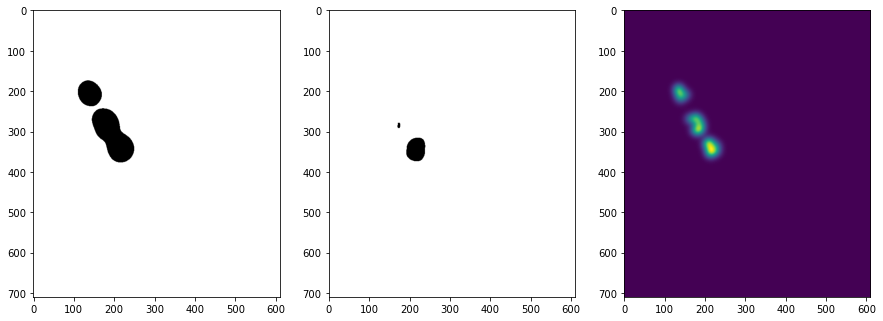

In [94]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('GT segmentation map')
plt.imshow(gt[20],cmap='gray')
plt.subplot(1,3,2)
plt.title('Pred segmentation map')
plt.imshow(mvms_new[20],cmap='gray')
plt.subplot(1,3,3)
plt.title('Pred density map')
plt.imshow(gt_den[20])

In [145]:
mvms_unet_new = []
for img in mvms_unet:
    img[img<0.5]=0
    img[img>0.5]=1
    mvms_unet_new.append(img)
    
mvms_unet = np.array(mvms_unet_new)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


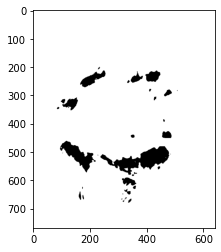

In [146]:
print(mvms_unet[0])
plt.imshow(mvms_unet[0].squeeze(),cmap='gray')

In [148]:
unet_new = []
for img in unet:
    img[img<0.5]=0
    img[img>0.5]=1
    unet_new.append(img)
    
unet = np.array(unet_new)

In [149]:
msunet_new = []
for img in msunet:
    img[img<0.5]=0
    img[img>0.5]=1
    msunet_new.append(img)
    
msunet = np.array(msunet_new)

In [150]:
print(msunet.shape)

(200, 768, 640)


In [24]:
def pixel_acc(gt,pred):
    acc = 0
    recall =0
    precision =0
    f1 = 0
    for i in tqdm(range(gt.shape[0])):
        gt_i = gt[i].flatten().squeeze()
        #print(gt_i)
        pred_i = pred[i].flatten().squeeze()
        [[tp,fn],[fp,tn]] = confusion_matrix(gt_i,pred_i)
        acc_i = (tp+tn)/(tp+fn+fp+tn)
        recall_i = tp/(tp+fn)
        precision_i = tp/(tp+fp)
        f1_i = 2*precision_i*recall_i/(precision_i+recall_i)
        
        acc += acc_i
        recall += recall_i
        precision += precision_i
        f1 += f1_i

    acc = acc/len(gt)
    recall = recall/len(gt)
    precision = precision /len(gt)
    f1 = f1/len(gt)
    return acc,recall,precision,f1


In [177]:
acc,recall,precision,f1 = pixel_acc(gt,mvms)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:41<00:00,  4.80it/s]


In [178]:
print(acc,recall,precision,f1)

0.9613593444824222 0.5498640244155293 0.6935691479067639 0.6051788350291889


In [179]:
acc,recall,precision,f1 = pixel_acc(gt,mvms_unet)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [02:55<00:00,  1.14it/s]


In [180]:
print(acc,recall,precision,f1)

0.9602390238444011 0.5625729894506474 0.6605925259226634 0.5992470394234416


In [175]:
acc,recall,precision,f1 = pixel_acc(gt,unet)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [02:56<00:00,  1.13it/s]


In [176]:
print(acc,recall,precision,f1)

0.9608267008463539 0.563018802777009 0.6682100038615679 0.6030940796291762


In [43]:
mvms = np.array(mvms,'b')

In [44]:
gt = np.array(gt,'b')

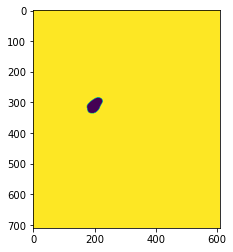

In [45]:
plt.imshow(mvms[0])

In [46]:
acc,recall,precision,f1 = pixel_acc(gt,mvms)

100%|████████████████████████████████████████████████████████████████████████████████| 794/794 [02:32<00:00,  5.21it/s]


In [47]:
print(acc,recall,precision,f1)

0.9850910372006159 0.6655451428481006 0.8349589337433085 0.716339376008494


In [ ]:
from img